# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [3]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [6]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Inauguration_moon.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

존경하고 사랑하는 국민 여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.
 
우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.

함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다.
 
존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다.
 
오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 국민 한분한분도 저의 국민이고, 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일 이날은 진정한 국민 통합이 시작된 날로 역사에 기록될 것입니다.
 
존

In [7]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("Inauguration_Park.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

존경하는 국민여러분! 700만 해외동포 여러분! 
저는 오늘 대한민국의 제18대 대통령에 취임하면서 희망의 새 시대를 열겠다는 각오로 이 자리에 섰습니다. 

저에게 이런 막중한 시대적 소명을 맡겨주신 국민 여러분께 깊이 감사드리며, 이 자리에 참석해주신 이명박 대통령과 전직 대통령, 그리고 세계 각국의 경축사절과 내외 귀빈 여러분께도 감사드립니다. 저는 대한민국의 대통령으로서 국민 여러분의 뜻에 부응하여 경제부흥과 국민행복, 문화융성을 이뤄낼 것입니다. 

부강하고, 국민 모두가 함께 행복한 대한민국을 만드는 데 저의 모든 것을 바치겠습니다.

국민여러분! 

오늘의 대한민국은 국민의 노력과 피와 땀으로 이룩된 것입니다. 하면 된다는 국민들의 강한 의지와 저력이 산업화와 민주화를 동시에 이룬 위대한 성취의 역사를 만들었습니다.

한강의 기적으로 불리는 우리의 역사는 독일의 광산에서, 열사의 중동 사막에서, 밤새 불이 꺼지지 않은 공장과 연구실에서, 그리고 영하 수십도의 최전방 전선에서 가족과 조국을 위해 헌신하신 위대한 우리 국민들이 계셔서 가능했습니다. 저는 오늘의 대한민국을 만드신 모든 우리 국민들께 진심으로 경의를 표합니다. 


존경하는 국민 여러분! 
격동의 현대사 속에서 수많은 고난과 역경을 극복해 온 우리 앞에 지금 글로벌 경제 위기와 북한의 핵무장 위협과 같은 안보위기가 이어지고 있습니다. 
글로벌 금융위기 이후 자본주의 역시 새로운 도전에 직면해 있습니다. 이번 도전은 과거와는 달리 우리가 스스로 새로운 길을 개척해야만 극복해나갈 수 있습니다.

새로운 길을 개척하는 것은 쉽지 않은 일입니다. 그러나 저는 우리 대한민국의 국민을 믿습니다. 역동적인 우리 국민의 강인함과 저력을 믿습니다. 

이제 자랑스런 우리 국민 여러분과 함께 희망의 새 시대, ‘제2의 한강의 기적’을 만드는 위대한 도전에 나서고자 합니다. 

국민 개개인의 행복의 크기가 국력의 크기가 되고, 그 국력을 모든 국민이 함께 향유하는 희망의 새 시대를 열겠습니다. 

존경하는 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [8]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['존경하고 사랑하는 국민 여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.\n \n우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.',
 '함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다.\n \n존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다.\n \n오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 국민 한분한분도 저의 국민이고, 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일 이날은 진정한 국민 통합이 시작된 날로 역사에 기록

In [9]:
# 연설문 2번 전처리
message_of_Park = message_of_kim.split('\n\n')
message_of_Park

['존경하는 국민여러분! 700만 해외동포 여러분! \n저는 오늘 대한민국의 제18대 대통령에 취임하면서 희망의 새 시대를 열겠다는 각오로 이 자리에 섰습니다. ',
 '저에게 이런 막중한 시대적 소명을 맡겨주신 국민 여러분께 깊이 감사드리며, 이 자리에 참석해주신 이명박 대통령과 전직 대통령, 그리고 세계 각국의 경축사절과 내외 귀빈 여러분께도 감사드립니다. 저는 대한민국의 대통령으로서 국민 여러분의 뜻에 부응하여 경제부흥과 국민행복, 문화융성을 이뤄낼 것입니다. ',
 '부강하고, 국민 모두가 함께 행복한 대한민국을 만드는 데 저의 모든 것을 바치겠습니다.',
 '국민여러분! ',
 '오늘의 대한민국은 국민의 노력과 피와 땀으로 이룩된 것입니다. 하면 된다는 국민들의 강한 의지와 저력이 산업화와 민주화를 동시에 이룬 위대한 성취의 역사를 만들었습니다.',
 '한강의 기적으로 불리는 우리의 역사는 독일의 광산에서, 열사의 중동 사막에서, 밤새 불이 꺼지지 않은 공장과 연구실에서, 그리고 영하 수십도의 최전방 전선에서 가족과 조국을 위해 헌신하신 위대한 우리 국민들이 계셔서 가능했습니다. 저는 오늘의 대한민국을 만드신 모든 우리 국민들께 진심으로 경의를 표합니다. ',
 '\n존경하는 국민 여러분! \n격동의 현대사 속에서 수많은 고난과 역경을 극복해 온 우리 앞에 지금 글로벌 경제 위기와 북한의 핵무장 위협과 같은 안보위기가 이어지고 있습니다. \n글로벌 금융위기 이후 자본주의 역시 새로운 도전에 직면해 있습니다. 이번 도전은 과거와는 달리 우리가 스스로 새로운 길을 개척해야만 극복해나갈 수 있습니다.',
 '새로운 길을 개척하는 것은 쉽지 않은 일입니다. 그러나 저는 우리 대한민국의 국민을 믿습니다. 역동적인 우리 국민의 강인함과 저력을 믿습니다. ',
 '이제 자랑스런 우리 국민 여러분과 함께 희망의 새 시대, ‘제2의 한강의 기적’을 만드는 위대한 도전에 나서고자 합니다. ',
 '국민 개개인의 행복의 크기가 국력의 크기가 되고, 그 국력을 모든 국민이

In [10]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<4x479 sparse matrix of type '<class 'numpy.int64'>'
	with 530 stored elements in Compressed Sparse Row format>

In [11]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_Park)
tf_bow2 = tf_vectorizer.fit_transform(message_of_Park)
tf_bow2

<150x796 sparse matrix of type '<class 'numpy.int64'>'
	with 1153 stored elements in Compressed Sparse Row format>

In [12]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

479
479


['18대',
 '21세기는',
 '2의',
 '5천',
 '700만',
 'it산업이',
 '가기',
 '가능했습니다',
 '가득한',
 '가장',
 '가족과',
 '가지고',
 '가치가',
 '가치로',
 '가치를',
 '각국의',
 '각오로',
 '각자의',
 '각종',
 '간다면',
 '간에',
 '간의',
 '갈등을',
 '감사드리며',
 '감사드립니다',
 '감사합니다',
 '감을',
 '갑시다',
 '강인함과',
 '강한',
 '갖고',
 '같은',
 '같이',
 '개개인의',
 '개발에',
 '개의',
 '개인의',
 '개인이',
 '개척하는',
 '개척해야만',
 '걷고',
 '걸어가야만',
 '걸음',
 '것은',
 '것을',
 '것이',
 '것이라고',
 '것이라는',
 '것이며',
 '것입니다',
 '격동의',
 '견인하고',
 '결정되는',
 '결정하는',
 '경계선에',
 '경의를',
 '경쟁력이',
 '경쟁에만',
 '경제',
 '경제를',
 '경제민주화가',
 '경제민주화를',
 '경제부흥',
 '경제부흥과',
 '경제부흥을',
 '경제의',
 '경축사절과',
 '계셔서',
 '계와',
 '계층',
 '고난과',
 '고립을',
 '고민하고',
 '고쳐서',
 '곳곳에',
 '곳곳에서',
 '곳에서도',
 '공동과',
 '공동발전의',
 '공동의',
 '공유의',
 '공장과',
 '공정한',
 '과거와는',
 '과거의',
 '과학기술과',
 '과학기술들을',
 '과학기술을',
 '관습을',
 '관행을',
 '광산에서',
 '교육시스템을',
 '교육에서',
 '교육을',
 '구조를',
 '구현하겠습니다',
 '국가',
 '국가가',
 '국가들과',
 '국가를',
 '국가발전과',
 '국가발전에',
 '국가와',
 '국가의',
 '국내의',
 '국력을',
 '국력의',
 '국력인',
 '국민',
 '국민도',
 '국민들께',
 '국민들에게',
 '국민들의',
 '국민들이',
 '국민맞춤형의',
 '국민여러분',
 '국민을',
 '국민의'

In [13]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

796
796


['18대',
 '21세기는',
 '2의',
 '5천',
 '700만',
 'it산업이',
 '가기',
 '가능했습니다',
 '가득한',
 '가장',
 '가족과',
 '가지고',
 '가치가',
 '가치로',
 '가치를',
 '각국의',
 '각오로',
 '각자의',
 '각종',
 '간다면',
 '간에',
 '간의',
 '갈등을',
 '감사드리며',
 '감사드립니다',
 '감사합니다',
 '감을',
 '갑시다',
 '강인함과',
 '강한',
 '갖고',
 '같은',
 '같이',
 '개개인의',
 '개발에',
 '개의',
 '개인의',
 '개인이',
 '개척하는',
 '개척해야만',
 '걷고',
 '걸어가야만',
 '걸음',
 '것은',
 '것을',
 '것이',
 '것이라고',
 '것이라는',
 '것이며',
 '것입니다',
 '격동의',
 '견인하고',
 '결정되는',
 '결정하는',
 '경계선에',
 '경의를',
 '경쟁력이',
 '경쟁에만',
 '경제',
 '경제를',
 '경제민주화가',
 '경제민주화를',
 '경제부흥',
 '경제부흥과',
 '경제부흥을',
 '경제의',
 '경축사절과',
 '계셔서',
 '계와',
 '계층',
 '고난과',
 '고립을',
 '고민하고',
 '고쳐서',
 '곳곳에',
 '곳곳에서',
 '곳에서도',
 '공동과',
 '공동발전의',
 '공동의',
 '공유의',
 '공장과',
 '공정한',
 '과거와는',
 '과거의',
 '과학기술과',
 '과학기술들을',
 '과학기술을',
 '관습을',
 '관행을',
 '광산에서',
 '교육시스템을',
 '교육에서',
 '교육을',
 '구조를',
 '구현하겠습니다',
 '국가',
 '국가가',
 '국가들과',
 '국가를',
 '국가발전과',
 '국가발전에',
 '국가와',
 '국가의',
 '국내의',
 '국력을',
 '국력의',
 '국력인',
 '국민',
 '국민도',
 '국민들께',
 '국민들에게',
 '국민들의',
 '국민들이',
 '국민맞춤형의',
 '국민여러분',
 '국민을',
 '국민의'

In [14]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10일', '19대', '2017년', '5월', '가겠습니다', '가고', '가까운', '가능할', '가득', '가슴은', '가장', '각지에서', '갈등은', '갈등을', '갈등의', '감내하며', '감사드립니다', '감사의', '감사합니다', '감히', '강력한', '강화하겠습니다', '강화하기', '거듭', '거짓으로', '것임을', '것입니다', '격변기를', '격이', '견제장치를', '결과는', '결별하겠습니다', '겸손한', '겸허한', '경쟁의', '경제가', '경험하지', '계기로', '계속되고', '계층과', '고르게', '고향으로', '곧바로', '골고른', '곳에', '공정한', '공정할', '공존의', '과감히', '과정은', '관행과', '광장에서', '광화문', '구속', '구시대의', '국민', '국민과', '국민들과', '국민들은', '국민들의', '국민들이', '국민으로', '국민은', '국민의', '국민이', '국민이고', '국방력에서', '국정운영의', '군림하고', '권력기관은', '권력을', '권력이', '권위적인', '그래서', '그런', '그리고', '그토록', '기관도', '기록될', '기회는', '긴장완화의', '길에', '길을', '깊이', '깨끗한', '꼼꼼하게', '끝나야', '나누겠습니다', '나눌', '나라', '나라냐고', '나라답게', '나라를', '나라입니다', '나서서', '나와', '날로', '날아가겠습니다', '남겠습니다', '낮은', '낱말이', '내딛습니다', '노력하겠습니다', '노심초사하는', '눈높이를', '눈물을', '능력과', '다시', '다하겠습니다', '다할', '닦아드리는', '대로', '대역사가', '대원칙으로', '대토론회를', '대통령', '대통령부터', '대통령으로', '대통령으로서', '대통령으로서의', '대통령을', '대통령의', '대통령이', '대통령이겠습니다', '대한', '대한민국', '대한민국은', '대한민국을', '대한민국의', '대한민국이', '대화를

array([ 2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  3,  1,  1, 12,  3,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  2,  4,  2,  1,  1,  1,  1,  2,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  2,  1,  1,
        1,  1,  5, 16,  1,  1,  3,  1,  3,  2,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1, 12,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  1,  2,  1,  5,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1

In [15]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['18대', '21세기는', '2의', '5천', '700만', 'it산업이', '가기', '가능했습니다', '가득한', '가장', '가족과', '가지고', '가치가', '가치로', '가치를', '각국의', '각오로', '각자의', '각종', '간다면', '간에', '간의', '갈등을', '감사드리며', '감사드립니다', '감사합니다', '감을', '갑시다', '강인함과', '강한', '갖고', '같은', '같이', '개개인의', '개발에', '개의', '개인의', '개인이', '개척하는', '개척해야만', '걷고', '걸어가야만', '걸음', '것은', '것을', '것이', '것이라고', '것이라는', '것이며', '것입니다', '격동의', '견인하고', '결정되는', '결정하는', '경계선에', '경의를', '경쟁력이', '경쟁에만', '경제', '경제를', '경제민주화가', '경제민주화를', '경제부흥', '경제부흥과', '경제부흥을', '경제의', '경축사절과', '계셔서', '계와', '계층', '고난과', '고립을', '고민하고', '고쳐서', '곳곳에', '곳곳에서', '곳에서도', '공동과', '공동발전의', '공동의', '공유의', '공장과', '공정한', '과거와는', '과거의', '과학기술과', '과학기술들을', '과학기술을', '관습을', '관행을', '광산에서', '교육시스템을', '교육에서', '교육을', '구조를', '구현하겠습니다', '국가', '국가가', '국가들과', '국가를', '국가발전과', '국가발전에', '국가와', '국가의', '국내의', '국력을', '국력의', '국력인', '국민', '국민도', '국민들께', '국민들에게', '국민들의', '국민들이', '국민맞춤형의', '국민여러분', '국민을', '국민의', '국민이', '국민행복', '국민행복시대는', '국민행복은', '국민행복이', '국정', '국제사회의', '귀빈', '규범을', '그것으로', '그것이', '그러나', '그런', '그리고', '극복해', '

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,
        2,  1,  1,  2,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  5,
        1,  1,  4,  1,  1,  1,  1,  1,  2,  2,  2,  3,  1,  1,  1, 22,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  2,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 26,  1,  1,  1,  1,  2,  1,  2,  1,  6,  8,
        4,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  2,  5,  1,  1,  1,  1,  2,  2,  2,  3,  1,  1,  2,  2,  2,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  3,  6,  1,  1,
        2,  2,  1,  1,  1

In [16]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'10일': 2,
 '19대': 2,
 '2017년': 2,
 '5월': 2,
 '가겠습니다': 1,
 '가고': 1,
 '가까운': 1,
 '가능할': 1,
 '가득': 1,
 '가슴은': 1,
 '가장': 1,
 '각지에서': 1,
 '갈등은': 1,
 '갈등을': 1,
 '갈등의': 1,
 '감내하며': 1,
 '감사드립니다': 1,
 '감사의': 1,
 '감사합니다': 2,
 '감히': 1,
 '강력한': 1,
 '강화하겠습니다': 1,
 '강화하기': 1,
 '거듭': 1,
 '거짓으로': 1,
 '것임을': 1,
 '것입니다': 6,
 '격변기를': 1,
 '격이': 1,
 '견제장치를': 1,
 '결과는': 1,
 '결별하겠습니다': 1,
 '겸손한': 1,
 '겸허한': 1,
 '경쟁의': 1,
 '경제가': 1,
 '경험하지': 1,
 '계기로': 1,
 '계속되고': 1,
 '계층과': 1,
 '고르게': 1,
 '고향으로': 1,
 '곧바로': 1,
 '골고른': 1,
 '곳에': 1,
 '공정한': 1,
 '공정할': 1,
 '공존의': 1,
 '과감히': 1,
 '과정은': 1,
 '관행과': 1,
 '광장에서': 1,
 '광화문': 3,
 '구속': 1,
 '구시대의': 1,
 '국민': 12,
 '국민과': 3,
 '국민들과': 1,
 '국민들은': 3,
 '국민들의': 1,
 '국민들이': 1,
 '국민으로': 1,
 '국민은': 1,
 '국민의': 1,
 '국민이': 1,
 '국민이고': 1,
 '국방력에서': 1,
 '국정운영의': 1,
 '군림하고': 1,
 '권력기관은': 1,
 '권력을': 2,
 '권력이': 1,
 '권위적인': 1,
 '그래서': 1,
 '그런': 1,
 '그리고': 2,
 '그토록': 1,
 '기관도': 1,
 '기록될': 1,
 '기회는': 1,
 '긴장완화의': 1,
 '길에': 1,
 '길을': 1,
 '깊이': 1,
 '깨끗한': 1,
 '꼼꼼하게': 1,
 '끝나야': 1,
 '나누겠습니다'

In [17]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'18대': 1,
 '21세기는': 1,
 '2의': 1,
 '5천': 1,
 '700만': 1,
 'it산업이': 1,
 '가기': 1,
 '가능했습니다': 1,
 '가득한': 1,
 '가장': 1,
 '가족과': 1,
 '가지고': 1,
 '가치가': 1,
 '가치로': 1,
 '가치를': 3,
 '각국의': 1,
 '각오로': 1,
 '각자의': 2,
 '각종': 1,
 '간다면': 1,
 '간에': 2,
 '간의': 1,
 '갈등을': 2,
 '감사드리며': 1,
 '감사드립니다': 1,
 '감사합니다': 1,
 '감을': 2,
 '갑시다': 1,
 '강인함과': 1,
 '강한': 1,
 '갖고': 1,
 '같은': 2,
 '같이': 1,
 '개개인의': 5,
 '개발에': 1,
 '개의': 1,
 '개인의': 4,
 '개인이': 1,
 '개척하는': 1,
 '개척해야만': 1,
 '걷고': 1,
 '걸어가야만': 1,
 '걸음': 2,
 '것은': 2,
 '것을': 2,
 '것이': 3,
 '것이라고': 1,
 '것이라는': 1,
 '것이며': 1,
 '것입니다': 22,
 '격동의': 1,
 '견인하고': 1,
 '결정되는': 1,
 '결정하는': 1,
 '경계선에': 1,
 '경의를': 1,
 '경쟁력이': 1,
 '경쟁에만': 1,
 '경제': 2,
 '경제를': 1,
 '경제민주화가': 1,
 '경제민주화를': 1,
 '경제부흥': 1,
 '경제부흥과': 1,
 '경제부흥을': 2,
 '경제의': 2,
 '경축사절과': 1,
 '계셔서': 1,
 '계와': 1,
 '계층': 1,
 '고난과': 1,
 '고립을': 1,
 '고민하고': 1,
 '고쳐서': 1,
 '곳곳에': 1,
 '곳곳에서': 1,
 '곳에서도': 1,
 '공동과': 1,
 '공동발전의': 1,
 '공동의': 1,
 '공유의': 1,
 '공장과': 1,
 '공정한': 2,
 '과거와는': 1,
 '과거의': 1,
 '과학기술과': 2,
 '과학기술들을': 1,
 '과학기술을'

### 시각화

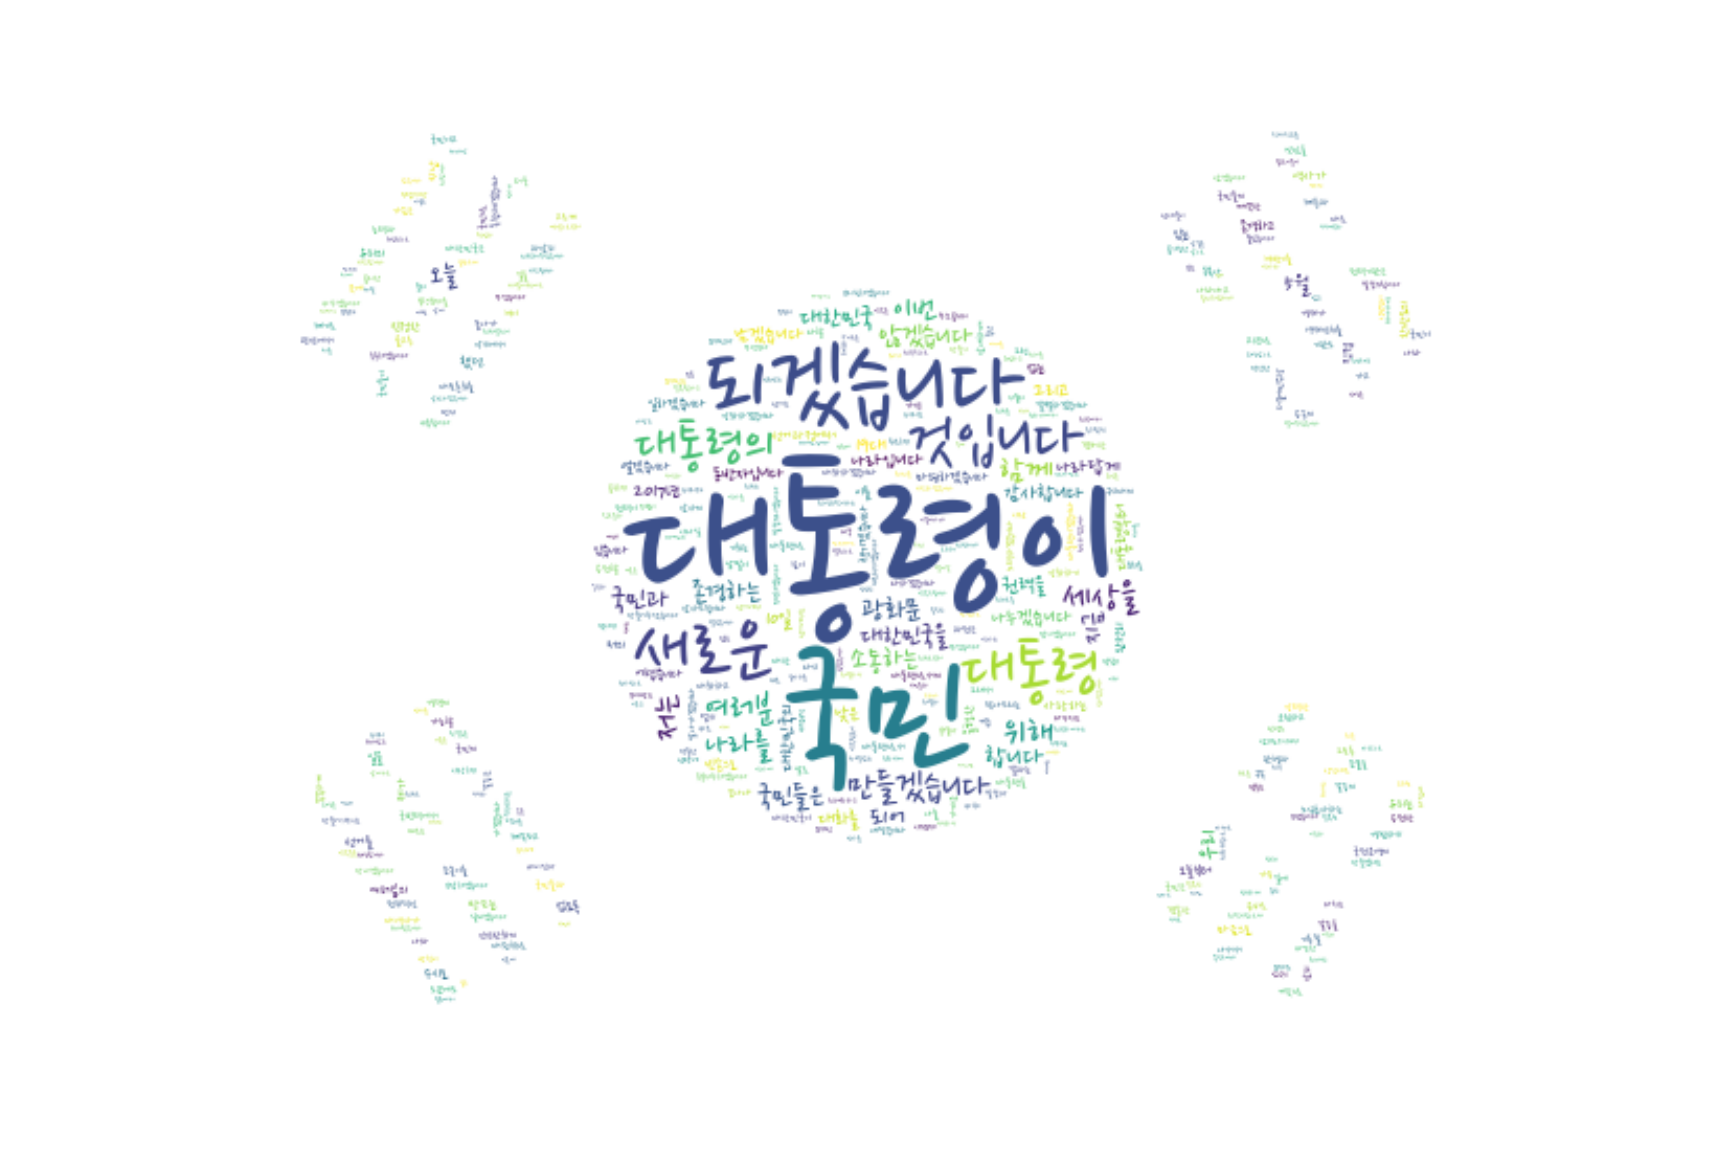

In [22]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

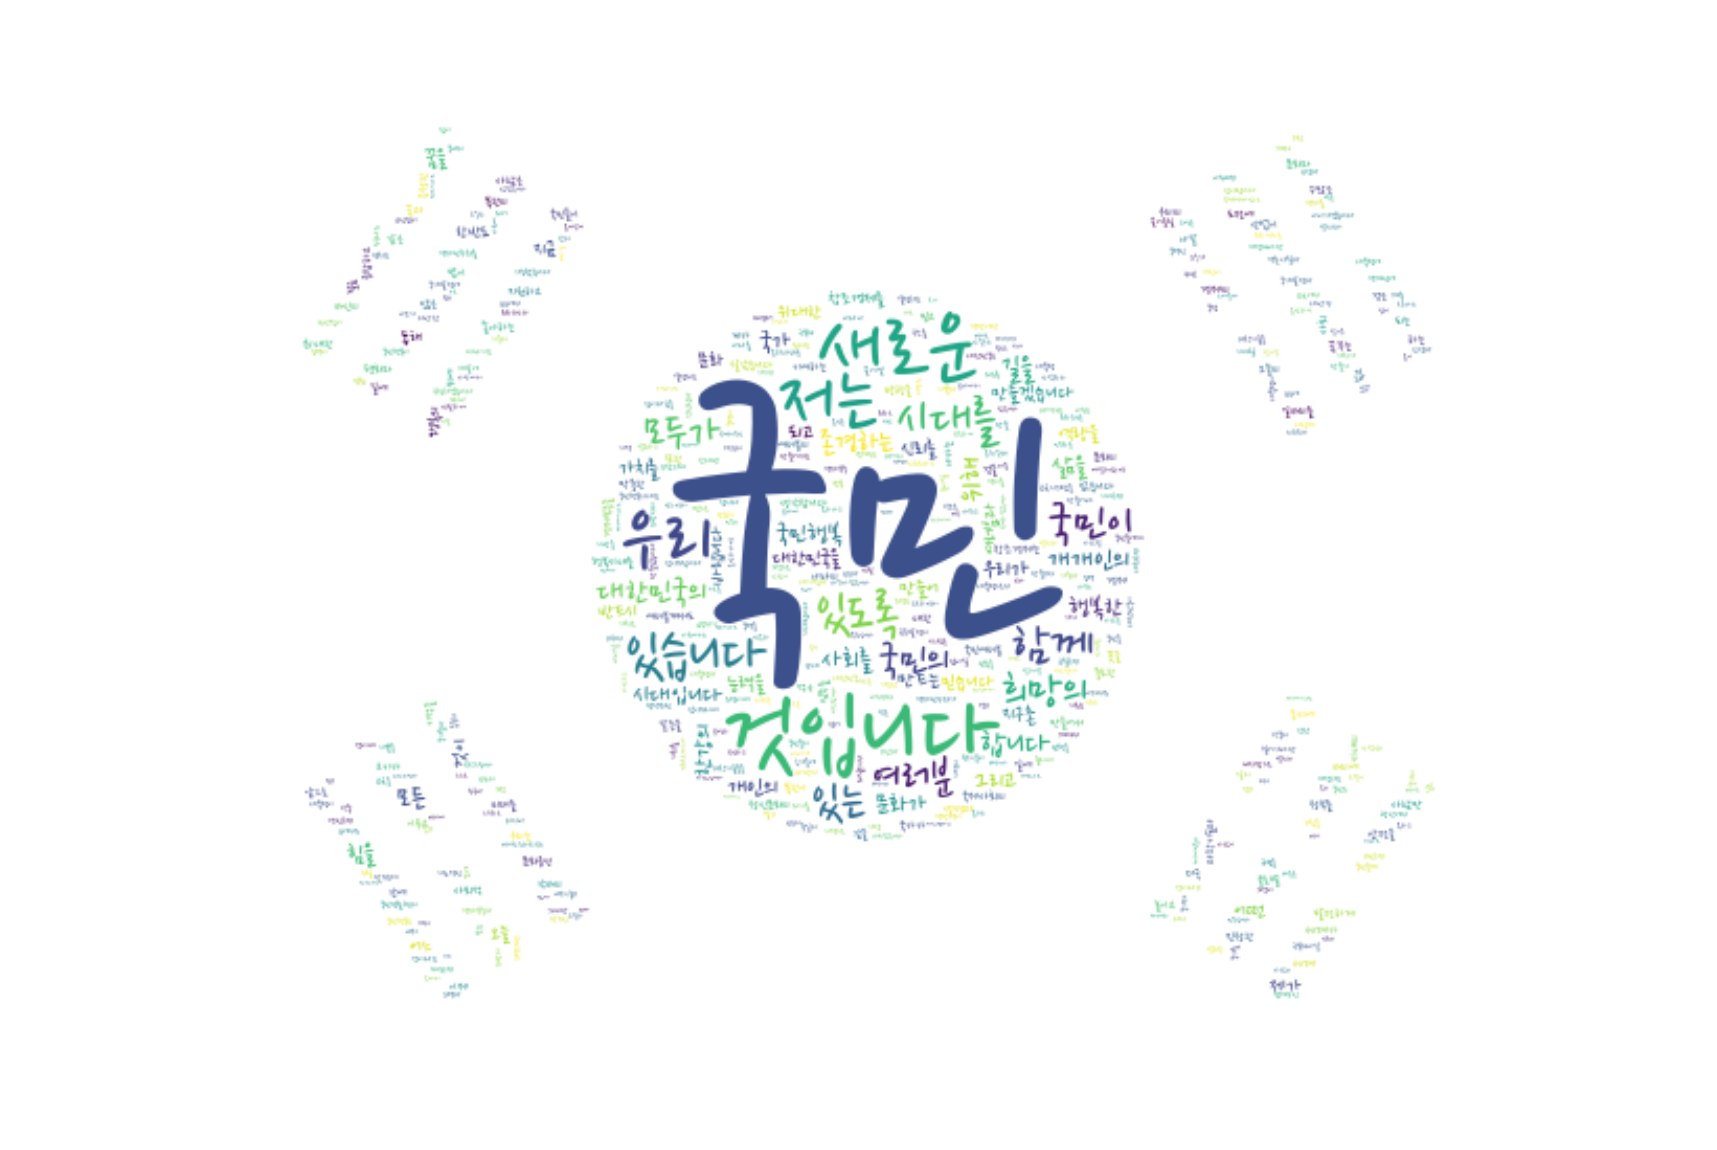

In [24]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("ParkSpeech.png") # 그림파일로 추출하기